# 2023년 서울 자치구 사고 빈도 분석

**서울 자치구별 최근 2023년 사고 건수**

In [173]:
# 라이브러리 불러오기
import pandas as pd
import folium

df=pd.read_excel('/content/서울구별사고빈도.xls', header=1)
print(df.head())
print(df.columns)

   지자체    2019년    2020년    2021년    2022년    2023년     5년평균 연평균 증감률  인구1만명당  \
0   전국  229,600  209,654  203,130  196,836  198,296  207,503     -3%    32.8   
1   서울   39,258   35,227   33,913   33,698   33,811   35,181     -3%    36.1   
2  종로구    1,133      903      778      974      988      955     -1%    70.9   
3   중구    1,184      955      854      943      931      973     -5%    76.7   
4  용산구    1,187      890    1,014    1,014      996    1,020     -3%    46.7   

   자동차1만대당  도로10Km당  
0     76.4      8.4  
1    106.0     20.2  
2    194.6     35.9  
3    170.0     81.5  
4    133.2     35.4  
Index(['지자체', '2019년', '2020년', '2021년', '2022년', '2023년', '5년평균', '연평균 증감률',
       '인구1만명당', '자동차1만대당', '도로10Km당'],
      dtype='object')


In [174]:
#데이터 전처리 과정

# 전국, 서울 행 제거 후 열이름 재정의
df = df[~df['지자체'].isin(['전국', '서울'])]
df = df.rename(columns={'지자체': '자치구'})

#타입 변환
df['2023년'] = df['2023년'].str.replace(',', '').astype(float)

# NaN값 제거
df = df.dropna(subset=['2023년'])

# 데이터 값 확인
print("최소값:", df['2023년'].min(), "최대값:", df['2023년'].max())

최소값: 530.0 최대값: 3926.0


In [178]:
s_map = folium.Map(location=[37.559984, 126.9753071], zoom_start=12)
s_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# Choropleth 맵 추가
folium.Choropleth(
    geo_data=s_geo,
    data=df,
    columns=['자치구', '2023년'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    threshold_scale=[500, 1000, 2000, 3000, 4000, 5000],
    legend_name='2023년 사고 건수'
).add_to(s_map)

# 지도 표시
s_map.save("서울시 자치구 2023년 사고 건수")
s_map

**사고 건수 상위 5개 구의 연도별 추세 분석**


In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

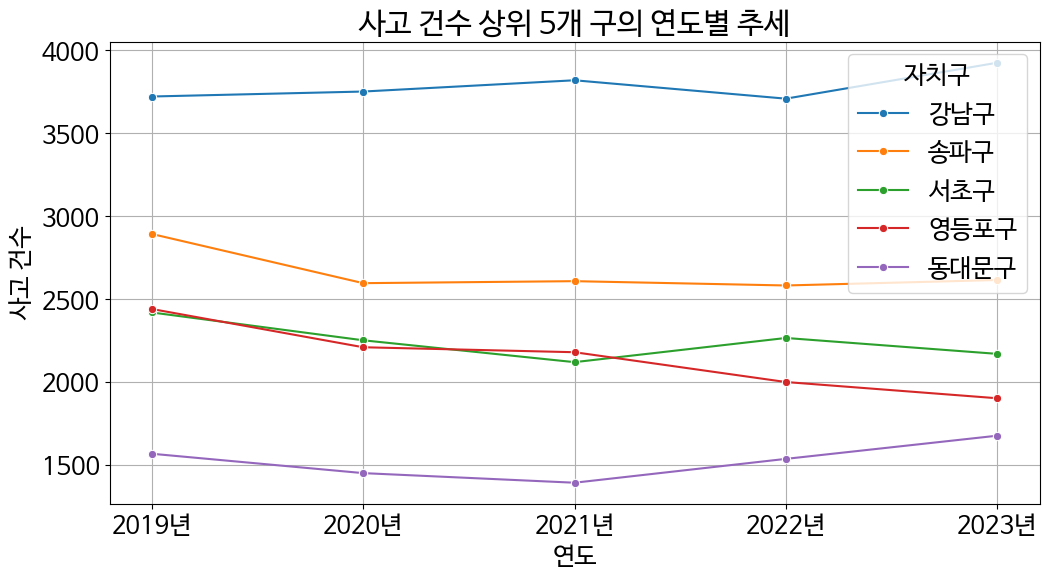

In [ ]:
df=pd.read_excel('/content/서울구별사고빈도.xls', header=1)
df = df.rename(columns={'지자체': '자치구'})
df2 = df[~df['자치구'].isin(['전국', '서울'])].copy()

# 쉼표 제거 및 숫자형 변환
for col in ['2019년', '2020년', '2021년', '2022년', '2023년']:
    df2[col] = pd.to_numeric(df2[col].astype(str).str.replace(',', ''))

# 상위 5개 구
top5 = df2.sort_values('2023년', ascending=False).head(5)

#
df_long = top5.melt(
    id_vars=['자치구'],
    value_vars=['2019년', '2020년', '2021년', '2022년', '2023년'],
    var_name='연도',
    value_name='사고건수'
)

# 그래프 생성
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='연도', y='사고건수', hue='자치구', marker='o')
plt.title('사고 건수 상위 5개 구의 연도별 추세')
plt.xlabel('연도')
plt.ylabel('사고 건수')
plt.grid(True)

plt.savefig("서울시 자치구 상위 5개 연도별 추세")
plt.show()

# 선형 회귀를 활용한 2024년 교통사고 건수 예측

In [ ]:
!pip install matplotlib pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/데이터예측.csv',  header=1)
print(df.head())

    기준년도     01월     02월     03월     04월     05월     06월     07월     08월  \
0  사고[건]  16,552  14,752  18,133  19,104  20,779  18,968  19,234  19,992   
1  사망[명]     296     203     252     286     305     279     241     253   
2  부상[명]  24,269  22,612  26,908  28,438  31,077  28,315  28,353  30,358   

      09월  ...   03월.4   04월.4   05월.4   06월.4   07월.4   08월.4   09월.4  \
0  19,331  ...  16,000  16,336  17,552  16,716  16,578  17,212  17,860   
1     287  ...     187     182     203     202     205     246     239   
2  28,746  ...  22,458  23,549  25,340  23,877  23,713  24,913  25,651   

    10월.4   11월.4   12월.4  
0  17,333  17,748  17,197  
1     265     257     194  
2  24,653  25,298  24,480  

[3 rows x 61 columns]


In [ ]:
# 사고건수 데이터 추출 + 전처리
accident_data = df[df['기준년도'] == '사고[건]'].iloc[:, 1:]  # '사고[건]' 행만 선택
accident_data = accident_data.applymap(lambda x: str(x).replace(',', '') if pd.notnull(x) else x).astype(float)  # 숫자로 변환
accident_data = accident_data.T                               # 월별 데이터를 행으로 변경
accident_data.columns = ['accidents']
accident_data.index = pd.date_range(start="2019-01", periods=len(accident_data), freq='M')  # 월별 날짜 생성


<ipython-input-110-83272649bf73>:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-110-83272649bf73>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<ipython-input-112-4a7b1a265389>:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



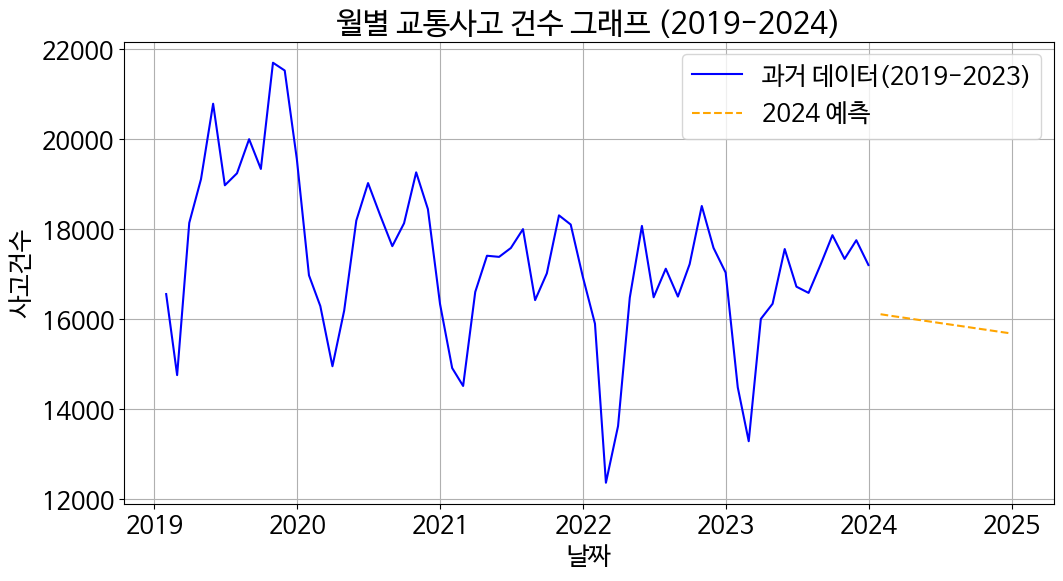

2024년 예측 데이터:
               accidents
2024-01-31  16104.221469
2024-02-29  16065.280096
2024-03-31  16026.338724
2024-04-30  15987.397351
2024-05-31  15948.455979
2024-06-30  15909.514606
2024-07-31  15870.573233
2024-08-31  15831.631861
2024-09-30  15792.690488
2024-10-31  15753.749115
2024-11-30  15714.807743
2024-12-31  15675.866370


<Figure size 640x480 with 0 Axes>

In [ ]:
# 선형 회귀 데이터 준비하기
X = np.arange(len(accident_data)).reshape(-1, 1)  # 월을 숫자로 변환
y = accident_data['accidents'].values

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 2024년 데이터 예측
future_X = np.arange(len(accident_data), len(accident_data) + 12).reshape(-1, 1)  # 2024년 월에 해당하는 숫자
future_y = model.predict(future_X)
future_dates = pd.date_range(start="2024-01", periods=12, freq='M')
forecast_df = pd.DataFrame(future_y, index=future_dates, columns=['accidents'])

# 기존 데이터와 예측 데이터 병합
combined_data = pd.concat([accident_data, forecast_df])

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(accident_data['accidents'], label="과거 데이터(2019-2023)", color="blue")
plt.plot(forecast_df['accidents'], label="2024 예측", linestyle="--", color="orange")
plt.title("월별 교통사고 건수 그래프 (2019-2024)")
plt.xlabel("날짜")
plt.ylabel("사고건수")
plt.legend()
plt.grid(True)
plt.show()

# 예측 데이터 출력
print("2024년 예측 데이터:")
print(forecast_df)

plt.savefig("2024 사고건수 예측 그래프.png", format="png")

# OECD 국가별 교통사고

**2019년 OECD 국가별 인구 10만명당 사망자수**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px


# 데이터 로드
df = pd.read_excel('/content/OECD국가별사고.xlsx', engine='openpyxl')
print(df.head())
print(df.columns)

    국가        2015       2015.1  2015.2 2015.3       2015.4       2015.5  \
0   국가     인구수(천명)  자동차등록대수(천대)   사고[건]  사망[명]  인구10만명당사망자수  자동차1만대당사망자수   
1   호주  23820.2365    18007.767       -   1205          5.1          0.7   
2   독일   82073.226        55752  305659   3459          4.2          0.6   
3  그리스   10806.641         9518   11440    793          7.3          0.8   
4  헝가리    9844.246     3886.341   16331    644          6.5          1.7   

         2015.6        2016       2016.1  ...       2018.4       2018.5  \
0  자동차1만대당사망자순위     인구수(천명)  자동차등록대수(천대)  ...  인구10만명당사망자수  자동차1만대당사망자수   
1            19  24195.7015    18387.136  ...          4.5          0.6   
2            22  82331.4225        56623  ...            4          0.6   
3            14   10749.742         9489  ...          6.6          0.7   
4             4   9815.1045     4022.798  ...          6.5          1.4   

         2018.6       2019       2019.1  2019.2 2019.3       2019.4  \
0  자동차1만대당사망자순위    인구

연도: 인구수 (천명)  
연도.1: 자동차 등록 대수 (천대)  
연도.2: 사고 건수  
연도.3: 사망자 수  
연도.4: 인구 10만 명당 사망자 수  
연도.5: 자동차 1만 대당 사망자 수  
연도.6: 자동차 1만 대당 사망자 순위

In [ ]:
# 필요한 열만 선택 및 이름 변경
columns_of_interest = ['국가', '2019', '2019.4']  # '2019.4'가 인구 10만 명당 사망자수
df_a = df[columns_of_interest]
df_a.columns = ['국가', '인구(천명)', '인구10만명당사망자수']

# 문자열을 숫자로 변환
df_a['인구10만명당사망자수'] = pd.to_numeric(df_a['인구10만명당사망자수'], errors='coerce')
df_a = df_a.dropna()  # NaN값 제거

# ISO Alpha-3 코드 매핑
iso_mapping = {
    "호주": "AUS",
    "독일": "DEU",
    "그리스": "GRC",
    "헝가리": "HUN",
    "아이슬란드": "ISL",
    "아일랜드": "IRL",
    "이탈리아": "ITA",
    "일본": "JPN",
    "룩셈부르크": "LUX",
    "멕시코": "MEX",
    "네덜란드": "NLD",
    "오스트리아": "AUT",
    "뉴질랜드": "NZL",
    "노르웨이": "NOR",
    "폴란드": "POL",
    "포르투갈": "PRT",
    "슬로바키아": "SVK",
    "슬로베니아": "SVN",
    "대한민국": "KOR",
    "스페인": "ESP",
    "스웨덴": "SWE",
    "스위스": "CHE",
    "벨기에": "BEL",
    "튀르키예": "TUR",
    "영국": "GBR",
    "미국": "USA",
    "에스토니아": "EST",
    "이스라엘": "ISR",
    "라트비아": "LVA",
    "리투아니아": "LTU",
    "콜롬비아": "COL",
    "코스타리카": "CRI",
    "캐나다": "CAN",
    "칠레": "CHL",
    "체코": "CZE",
    "덴마크": "DNK",
    "핀란드": "FIN",
    "프랑스": "FRA"
}
df_a['iso_alpha'] = df_a['국가'].map(iso_mapping)


# Choropleth Map 생성
trace = go.Choropleth(
    locations=df_a['iso_alpha'],         # ISO Alpha-3 코드
    z=df_a['인구10만명당사망자수'],      # 색상으로 표현할 값
    colorscale='Reds',                   # 색상 스케일
    colorbar_title='사망률 (10만명당)',  # 색상바 제목
    text=df_a['국가'],                   # 국가 이름 표시
    hoverinfo='text+z'                   # 텍스트 및 값 표시
)
data = [trace]

layout = go.Layout(
    title='2019년 OECD 국가별 인구 10만명당 사망자수',
    geo=dict(
        projection_type='equirectangular',  # 지구 투영 방식
        showframe=False,                    # 지도 프레임 제거
        showcoastlines=True                 # 해안선 표시
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

fig.write_html("2019년 OECD 국가별 인구 10만명당 사망자수.html")

<ipython-input-72-a76ab847a390>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**OECD 국가별 2015년~2019년 사망자 수**

In [ ]:
# 필요한 열만 선택 및 이름 변경
df_selected = ['국가', '2015.3', '2016.3', '2017.3', '2018.3', '2019.3']
df_a = df[df_selected]
df_a.columns = ['국가', '2015', '2016', '2017', '2018', '2019']

# 긴 형태로 변환
df_long = pd.melt(df_a, id_vars=['국가'], var_name='연도', value_name='사망자수')

# 문자열을 숫자로 변환
df_long['사망자수'] = pd.to_numeric(df_long['사망자수'], errors='coerce')

# NaN값 제거
df_long = df_long.dropna(subset=['사망자수'])

# ISO 3166 표준 국가 코드 매핑
iso_mapping = {
    "호주": "AUS",
    "독일": "DEU",
    "그리스": "GRC",
    "헝가리": "HUN",
    "아이슬란드": "ISL",
    "아일랜드": "IRL",
    "이탈리아": "ITA",
    "일본": "JPN",
    "룩셈부르크": "LUX",
    "멕시코": "MEX",
    "네덜란드": "NLD",
    "오스트리아": "AUT",
    "뉴질랜드": "NZL",
    "노르웨이": "NOR",
    "폴란드": "POL",
    "포르투갈": "PRT",
    "슬로바키아": "SVK",
    "슬로베니아": "SVN",
    "대한민국": "KOR",
    "스페인": "ESP",
    "스웨덴": "SWE",
    "스위스": "CHE",
    "벨기에": "BEL",
    "튀르키예": "TUR",
    "영국": "GBR",
    "미국": "USA",
    "에스토니아": "EST",
    "이스라엘": "ISR",
    "라트비아": "LVA",
    "리투아니아": "LTU",
    "콜롬비아": "COL",
    "코스타리카": "CRI",
    "캐나다": "CAN",
    "칠레": "CHL",
    "체코": "CZE",
    "덴마크": "DNK",
    "핀란드": "FIN",
    "프랑스": "FRA"
}

df_long['iso_alpha'] = df_long['국가'].map(iso_mapping)

# Plotly Scatter Geo Map 생성
fig = px.scatter_geo(
    df_long,
    locations="iso_alpha",  # ISO Alpha-3 코드
    size="사망자수",  # 점 크기
    color="사망자수",  # 점 색상
    hover_name="국가",
    animation_frame="연도",
    projection="natural earth"
)

fig.update_layout(
    title="OECD 국가별 사망자 수(2015~2019)",
    geo_scope="world"  # 세계 지도 설정
)
fig.show()
fig.write_html("OECD 국가별 사망자 수(2015~2019).html")

**OECD 국가별 자동차 1만 대당 사망자 순위 변동 (2015~2019)**

In [ ]:
import pandas as pd
import plotly.express as px

# 데이터 로드
df = pd.read_excel('/content/OECD국가별사고.xlsx', engine='openpyxl')

# 필요한 열만 선택 및 이름 변경
df_selected = ['국가', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5']  # 순위 열 선택
df_a = df[df_selected]
df_a.columns = ['국가', '2015', '2016', '2017', '2018', '2019']

# 긴 형태로 변환
df_long = pd.melt(df_a, id_vars=['국가'], var_name='연도', value_name='순위')

# 문자열을 숫자로 변환
df_long['순위'] = pd.to_numeric(df_long['순위'], errors='coerce')

# NaN값 제거
df_long = df_long.dropna(subset=['순위'])

# Bar Chart Race 생성
fig = px.bar(
    df_long.sort_values(by=['연도', '순위']),
    x='순위',
    y='국가',
    color='국가',
    animation_frame='연도',
    orientation='h',
    title='자동차 1만 대당 사망자 순위 변동 (2015~2019)',
    labels={'순위': '자동차1만대당사망자수', '국가': '국가'}
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()
fig.write_html("자동차 1만 대당 사망자 순위 변동 (2015~2019).html")

# 운전자 교통법규 위반 사고 건수 상위 5개

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/교통법규위반사고.csv')

print(df.head())
print(df.columns)

      구분   과로  앞지르기방법위반  앞지르기금지위반   중앙선침범    신호위반 안전거리미확보 일시정지위반  부당한회전  \
0  사고[건]  2.0     106.0     244.0   7,385  23,444  22,231    667  1,449   
1  사망[명]  0.0       1.0       4.0     169     199      47      2     13   
2  부상[명]  3.0     164.0     383.0  12,187  35,791  35,497  1,121  1,902   
3    NaN  NaN       NaN       NaN     NaN     NaN     NaN    NaN    NaN   
4    NaN  NaN       NaN       NaN     NaN     NaN     NaN    NaN    NaN   

   우선권양보불이행  진로양보불이행 안전운전의무불이행 교차로운행방법위반 보행자보호의무위반 차로위반(진로변경) 직진우회전진행방해  \
0       8.0     29.0   110,868    11,060     7,227      2,641     5,286   
1       0.0      1.0     1,754        27        98          5        17   
2      11.0     40.0   152,964    16,493     7,573      3,947     8,368   
3       NaN      NaN       NaN       NaN       NaN        NaN       NaN   
4       NaN      NaN       NaN       NaN       NaN        NaN       NaN   

   철길건널목통과방법  긴급차피양의무위반     기타  
0        1.0        3.0  5,637  
1        0.0        0.0    213  

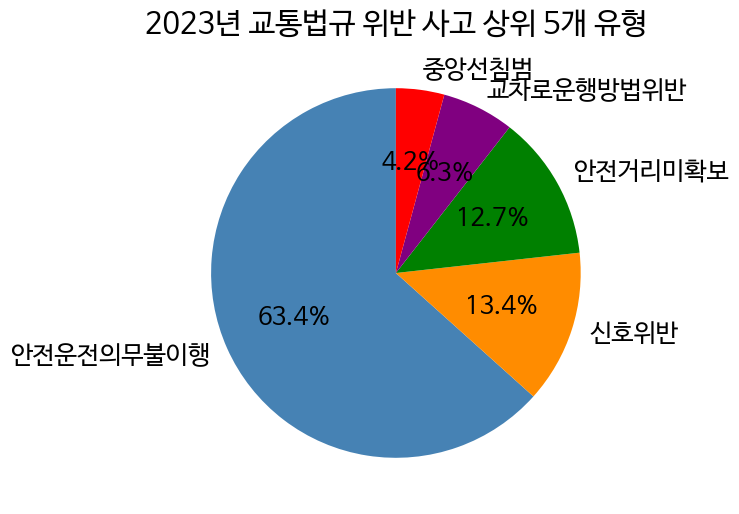

In [ ]:
# 사고 데이터만 추출
accident_data = df[df['구분'] == '사고[건]'].iloc[:, 1:]  # 숫자 데이터만 추출

# 쉼표 제거 및 숫자형 변환
accident_data = accident_data.replace(',', '', regex=True).astype(float)

# 합계 계산 및 상위 5개 추출
sorted_data = accident_data.iloc[0].sort_values(ascending=False)
top5 = sorted_data.head(5)

# 시각화
plt.figure(figsize=(8, 6))
colors = ['steelblue', 'darkorange', 'green', 'purple', 'red']
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('2023년 교통법규 위반 사고 상위 5개 유형')

plt.savefig("교통법규위반 상위5.png")
plt.show()

# 2023년도 월별 교통사고 시각화

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/도로교통공단_월별 교통사고 통계_2023.csv', encoding='cp949')

print(df.head())
print(df.columns)

   발생월   사고건수  사망자수  중상자수   경상자수  부상신고자수
0    1  14480   190  3748  15789    1289
1    2  13284   181  3568  14263    1210
2    3  16000   187  4049  17062    1347
3    4  16336   182  4406  17537    1606
4    5  17552   203  4708  18851    1781
Index(['발생월', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수'], dtype='object')


In [ ]:
fig = px.bar(df, x='발생월', y='사고건수',
             color='발생월',
             color_continuous_scale=px.colors.diverging.Spectral,
             title='2023년 월별 사고 건수')

# 그래프 레이아웃 조정
fig.update_layout(
    width=800,
    height=500,
    xaxis_title="발생월",
    yaxis_title="사고건수",
    coloraxis_showscale=False
)

fig.write_html("2023년 월별 사고건수.html")
fig.show()

<ipython-input-166-e0d394c761f4>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




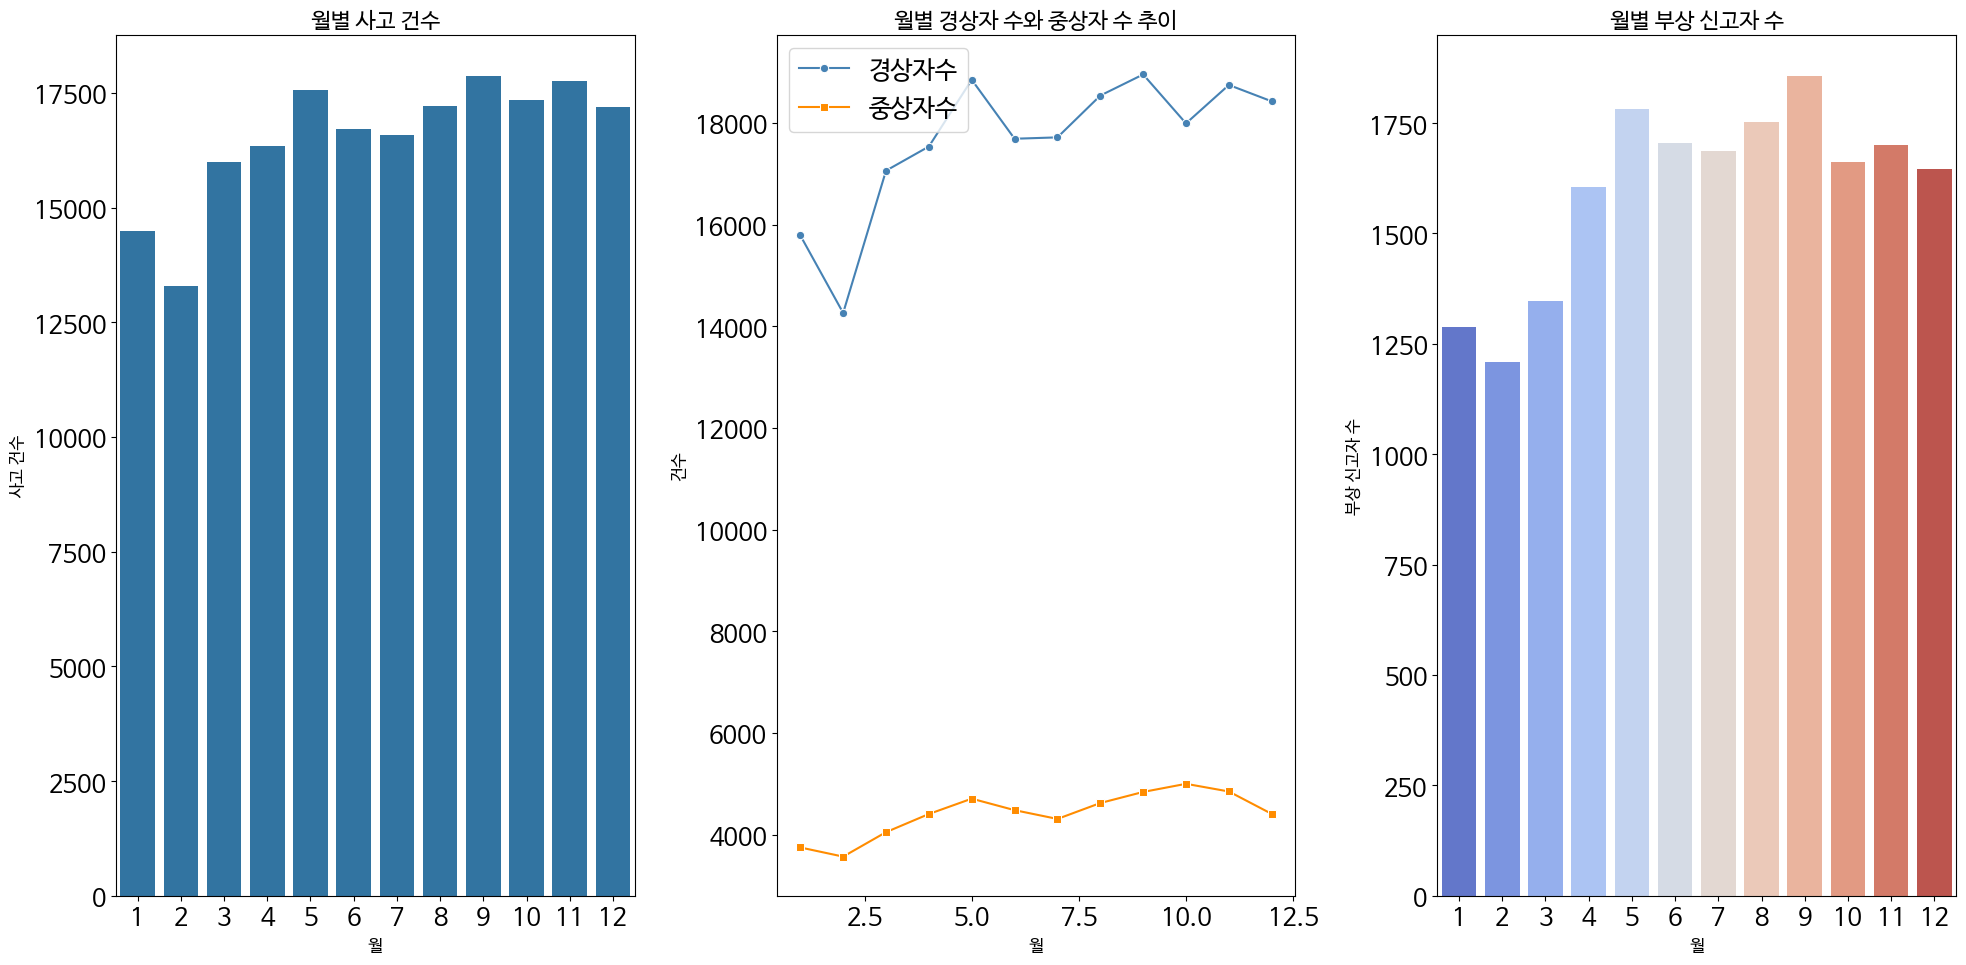

In [ ]:
fig = plt.figure(figsize=(20, 10))

# 서브플롯 1: 월별 사고건수 막대 그래프
ax1 = fig.add_subplot(1, 3, 1)
sns.barplot(data=df, x='발생월', y='사고건수', ax=ax1)
ax1.set_title("월별 사고 건수", fontsize=16)
ax1.set_xlabel("월", fontsize=12)
ax1.set_ylabel("사고 건수", fontsize=12)

# 서브플롯 2: 경상자수와 중상자 수 선 그래프
ax2 = fig.add_subplot(1, 3, 2)
sns.lineplot(data=df, x='발생월', y='경상자수', label='경상자수', marker='o', ax=ax2, color='steelblue')
sns.lineplot(data=df, x='발생월', y='중상자수', label='중상자수', marker='s', ax=ax2, color='darkorange')
ax2.set_title("월별 경상자 수와 중상자 수 추이", fontsize=16)
ax2.set_xlabel("월", fontsize=12)
ax2.set_ylabel("건수", fontsize=12)
ax2.legend(loc='upper left')

# 서브플롯 3: 월별 부상 신고자수 카운트 플롯
ax3 = fig.add_subplot(1, 3, 3)
sns.barplot(data=df, x='발생월', y='부상신고자수', ax=ax3, palette="coolwarm")
ax3.set_title("월별 부상 신고자 수", fontsize=16)
ax3.set_xlabel("월", fontsize=12)
ax3.set_ylabel("부상 신고자 수", fontsize=12)

plt.savefig("월별 자료 시각화.png")
plt.tight_layout()
plt.show()